# Credit-Card Fraud Prediction Project

In [1]:
# Importing essential libraries

import os  
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read dataset in notebook
data = pd.read_csv(r"C:\Users\karti\Downloads\creditcard.csv")

## Overview of dataset

In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


By overviewing dataset we can see dataset contains some outliers 

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Dataset have no missing values

## Exploratory Data Analysis 

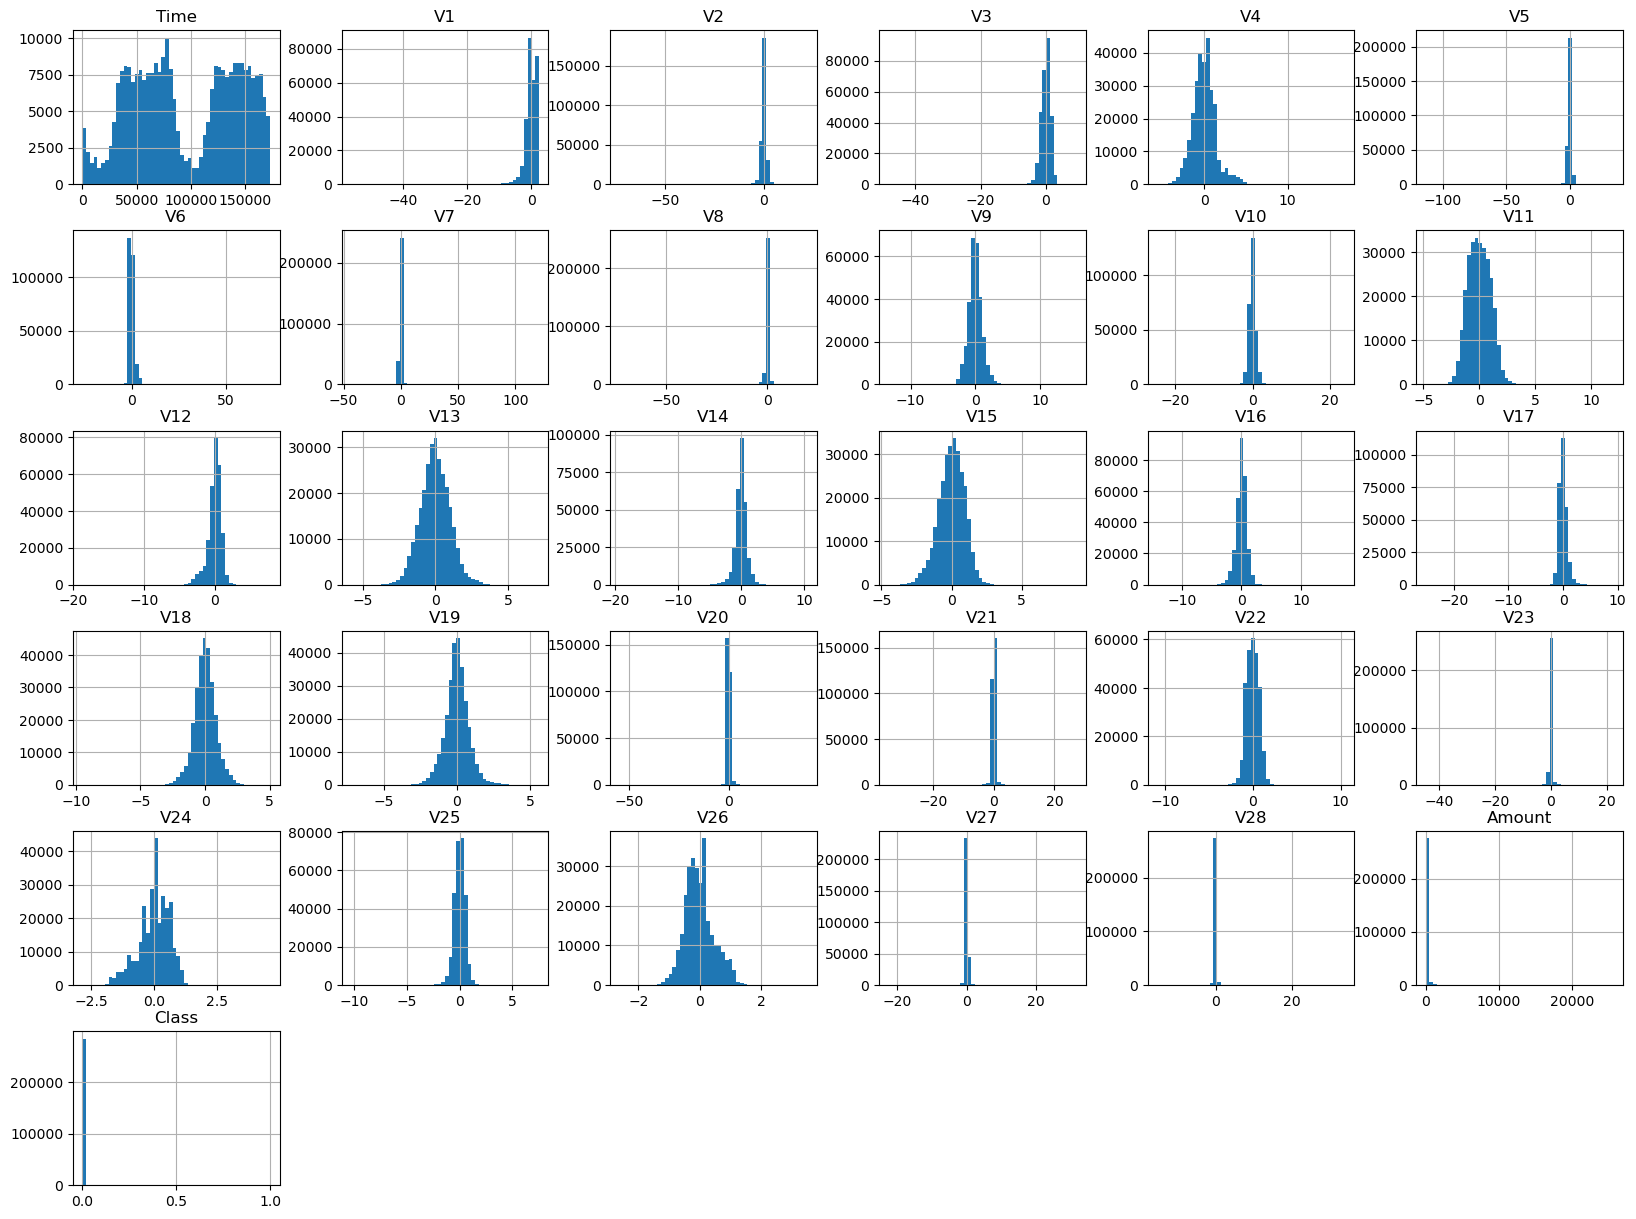

In [9]:
data.hist(bins = 50, figsize = (20, 15))
plt.show()

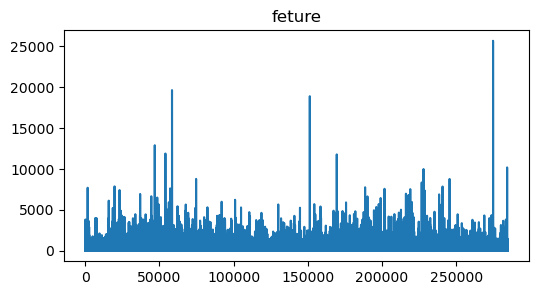

In [10]:
plt.figure(figsize = (6, 3))
plt.plot(data['Amount'])
plt.title("feture")
plt.show()

In [11]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Data is highly imbalance 

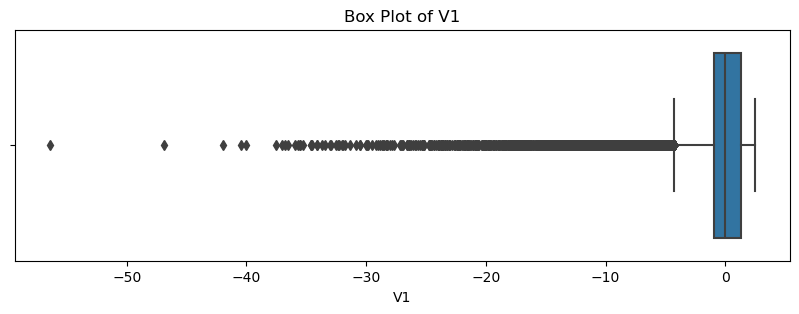

In [12]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['V1'])
plt.title("Box Plot of V1")
plt.show()

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


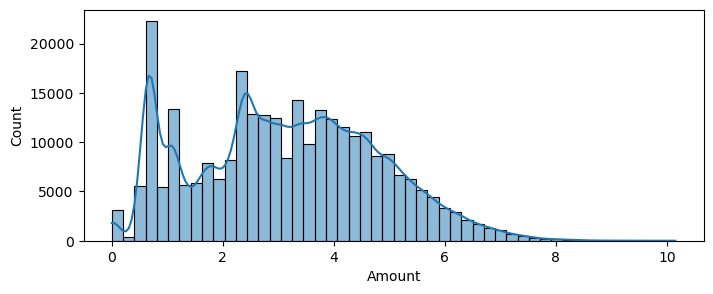

In [13]:
plt.figure(figsize=(8, 3))
sns.histplot(np.log1p(data['Amount']), bins=50, kde=True)
plt.show()

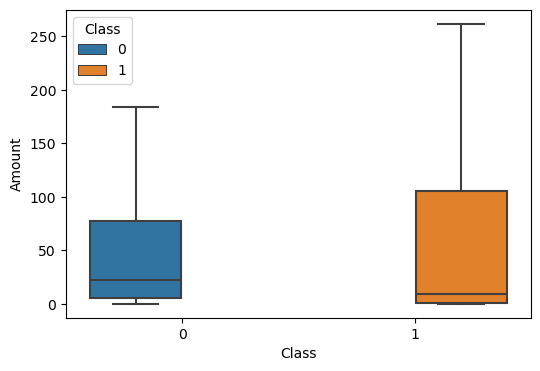

In [14]:
fig, (a) = plt.subplots(ncols = 1, figsize = (6, 4))
s = sns.boxplot(ax = a, x = 'Class', y = 'Amount', hue = 'Class', data = data, showfliers = False)
plt.show()

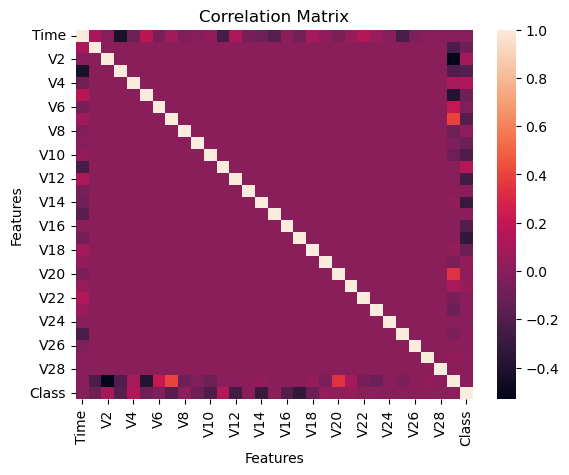

In [15]:
sns.heatmap(data.corr())
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [16]:
# Features correlation with class
corr_matrix = data.corr()
corr_matrix['Class'].sort_values(ascending = False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

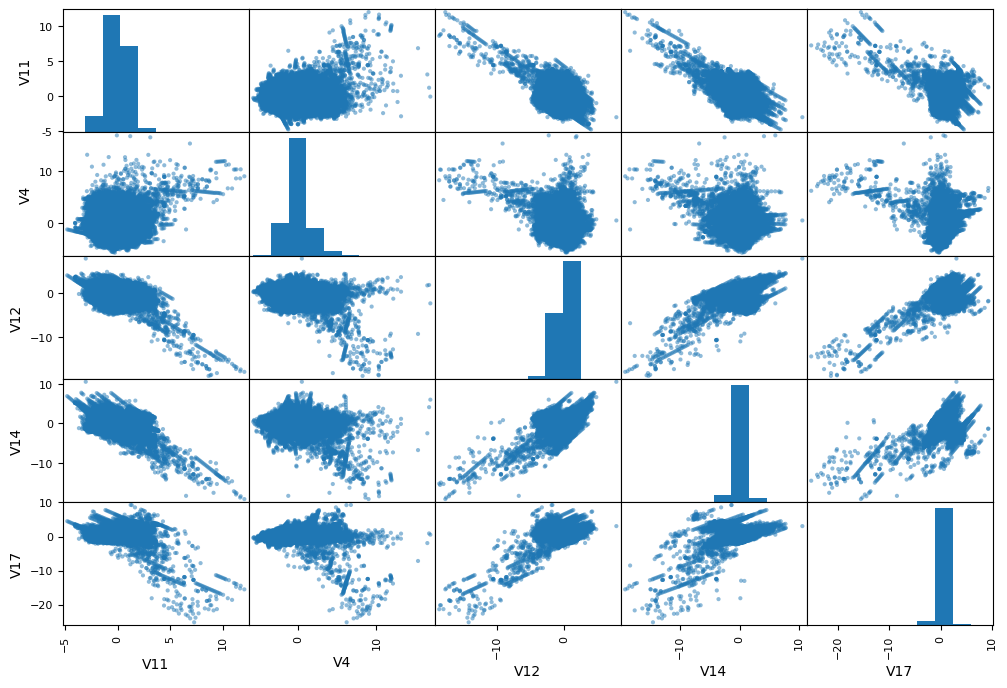

In [17]:
# Plotting correlation for some important features with Class 
from pandas.plotting import scatter_matrix
atrib = ['V11','V4','V12','V14','V17']
scatter_matrix(data[atrib], figsize = (12, 8))
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
std_sr = StandardScaler()
data['Amount'] = std_sr.fit_transform(pd.DataFrame(data['Amount']))
data['Time'] = std_sr.fit_transform(pd.DataFrame(data['Time']))

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [20]:
# Removing duplicate rows
data = data.drop_duplicates()

In [21]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [22]:
# Positive class
fraud = data[data.Class == 1]
# Negative class
normal_tran = data[data.Class == 0]

In [23]:
(normal_tran.shape, fraud.shape)

((283253, 31), (473, 31))

In [24]:
# statistical observations
(normal_tran.Amount.describe(),  fraud.Amount.describe())

(count    283253.000000
 mean          0.000256
 std           1.001037
 min          -0.353229
 25%          -0.330560
 50%          -0.265271
 75%          -0.043538
 max         102.362243
 Name: Amount, dtype: float64,
 count    473.000000
 mean       0.142021
 std        1.040346
 min       -0.353229
 25%       -0.349231
 50%       -0.313968
 75%        0.070128
 max        8.146182
 Name: Amount, dtype: float64)

In [25]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.000446,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,0.000256
1,-0.302462,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


## Dataset is highly imbalance therefore we use undersampling and oversampling method

## 1. Under-sampling:

In [26]:
Sample_normal_tran = normal_tran.sample(n = 473)

In [27]:
(Sample_normal_tran.shape, fraud.shape)

((473, 31), (473, 31))

##### Data is balanced now

In [28]:
data_new = pd.concat([Sample_normal_tran, fraud], axis = 0, ignore_index = True)

In [29]:
data_new['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [30]:
data_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.797193,-1.656005,0.435948,0.687670,-0.726255,0.795383,0.787367,1.889338,-0.742437,1.704635,...,-0.787916,-0.637294,-0.345926,0.300354,0.095693,-0.011195,-0.016088,-0.148172,0.265514,0
1,1.412442,0.886508,0.815258,-2.598932,1.217321,1.071380,-0.386947,0.108278,-3.046489,-0.595303,...,-0.798778,1.696728,-0.033144,0.417312,-0.253000,-0.296147,0.290970,0.459716,-0.065367,0
2,-0.382030,1.128252,-0.041579,1.419270,1.424588,-1.168109,-0.400618,-0.568017,0.082260,0.906705,...,-0.043265,0.067410,0.037980,0.702697,0.362398,-0.428129,0.071263,0.041104,-0.313289,0
3,-1.482622,-0.356842,1.150539,1.310121,0.076118,0.286551,-0.438218,0.466562,0.044003,0.730008,...,-0.391156,-0.865526,-0.054700,-0.128138,-0.186971,0.038252,0.211945,0.077160,-0.348072,0
4,1.285210,1.954235,0.620918,-1.413561,3.684596,1.052599,0.030737,0.591005,-0.178128,-1.108465,...,-0.038426,-0.099765,0.080427,0.447807,0.268828,0.001900,-0.071933,-0.053505,-0.258915,0


In [31]:
X = data_new.drop('Class', axis = 1)
y = data_new['Class']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


## Model trainig

### a. Losgistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
# model trainig
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
# accuracy on training dataset
y_pred1 = lr.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred1)
print('accuracy_score: ',accuracy_score(y_test, y_pred1))
precision_score(y_test, y_pred1)
print('precision_score: ',precision_score(y_test, y_pred1))
recall_score(y_test, y_pred1)
print('recall_score: ',recall_score(y_test, y_pred1))
f1_score(y_test, y_pred1)
print('f1_score: ',f1_score(y_test, y_pred1))

accuracy_score:  0.9526315789473684
precision_score:  0.9894736842105263
recall_score:  0.9215686274509803
f1_score:  0.9543147208121827


### b. Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred2 = dt.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred2)
print('accuracy_score: ',accuracy_score(y_test, y_pred2))
precision_score(y_test, y_pred2)
print('precision_score: ',precision_score(y_test, y_pred2))
recall_score(y_test, y_pred2)
print('recall_score: ',recall_score(y_test, y_pred2))
f1_score(y_test, y_pred2)
print('f1_score: ',f1_score(y_test, y_pred2))

accuracy_score:  0.8894736842105263
precision_score:  0.9175257731958762
recall_score:  0.8725490196078431
f1_score:  0.8944723618090452


### c. Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred3 = rf.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred3)
print('accuracy_score: ',accuracy_score(y_test, y_pred3))
precision_score(y_test, y_pred3)
print('precision_score: ',precision_score(y_test, y_pred3))
recall_score(y_test, y_pred3)
print('recall_score: ',recall_score(y_test, y_pred3))
f1_score(y_test, y_pred3)
print('f1_score: ',f1_score(y_test, y_pred3))

accuracy_score:  0.9421052631578948
precision_score:  0.989247311827957
recall_score:  0.9019607843137255
f1_score:  0.9435897435897437


In [44]:
result1 = pd.DataFrame({'Model':['LR','DT','RF'], 
                       "Accuracy_score":[accuracy_score(y_test,y_pred1)*100, accuracy_score(y_test,y_pred2)*100, accuracy_score(y_test,y_pred3)*100],
                       "Precision_score":[precision_score(y_test,y_pred1)*100, precision_score(y_test,y_pred2)*100, precision_score(y_test,y_pred3)*100],
                       "recall_score":[recall_score(y_test,y_pred1)*100, recall_score(y_test,y_pred2)*100, recall_score(y_test,y_pred3)*100],
                       "f1_score":[f1_score(y_test,y_pred1)*100, f1_score(y_test,y_pred2)*100, f1_score(y_test,y_pred3)*100]
                     })
result1

,Model,Accuracy_score,Precision_score,recall_score,f1_score
0,LR,95.263158,98.947368,92.156863,95.431472
1,DT,88.947368,91.752577,87.254902,89.447236
2,RF,94.210526,98.924731,90.196078,94.358974


<Axes: xlabel='Model', ylabel='Accuracy_score'>

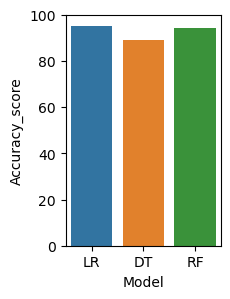

In [45]:
plt.figure(figsize=(2, 3))
sns.barplot(x='Model', y='Accuracy_score', data=result1)

## 2. Over-sampling

In [46]:
X = data.drop('Class',axis=1)
y = data['Class']

In [47]:
(X.shape, y.shape)

((283726, 30), (283726,))

In [48]:
y.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [49]:
# To increase fraud data we use smote

from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)

In [50]:
(X_res.shape, y_res.shape)

((566506, 30), (566506,))

In [51]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

#### Now dataset is balance as over-sampling

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=42)

In [53]:
print(X_res.shape, X_train.shape, X_test.shape)

(566506, 30) (453204, 30) (113302, 30)


## Model trainig

### a. Losgistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [55]:
# model trainig
lr.fit(X_train, y_train)

LogisticRegression()

In [56]:
# accuracy on training dataset
y_pred1 = lr.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred1)
print('accuracy_score: ',accuracy_score(y_test, y_pred1))
precision_score(y_test, y_pred1)
print('precision_score: ',precision_score(y_test, y_pred1))
recall_score(y_test, y_pred1)
print('recall_score: ',recall_score(y_test, y_pred1))
f1_score(y_test, y_pred1)
print('f1_score: ',f1_score(y_test, y_pred1))

accuracy_score:  0.9466293622354416
precision_score:  0.973046976865477
recall_score:  0.9190696528791851
f1_score:  0.9452883962904319


### b. Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred2 = dt.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred2)
print('accuracy_score: ',accuracy_score(y_test, y_pred2))
precision_score(y_test, y_pred2)
print('precision_score: ',precision_score(y_test, y_pred2))
recall_score(y_test, y_pred2)
print('recall_score: ',recall_score(y_test, y_pred2))
f1_score(y_test, y_pred2)
print('f1_score: ',f1_score(y_test, y_pred2))

accuracy_score:  0.9982348060934494
precision_score:  0.9975403643774486
recall_score:  0.9989443867766851
f1_score:  0.9982418818896254


In [61]:
result2 = pd.DataFrame({'Model':['LR','DT'], 
                       "Accuracy_score":[accuracy_score(y_test,y_pred1)*100, accuracy_score(y_test,y_pred2)*100],
                       "Precision_score":[precision_score(y_test,y_pred1)*100, precision_score(y_test,y_pred2)*100],
                       "recall_score":[recall_score(y_test,y_pred1)*100, recall_score(y_test,y_pred2)*100],
                       "f1_score":[f1_score(y_test,y_pred1)*100, f1_score(y_test,y_pred2)*100]
                     })
result2

,Model,Accuracy_score,Precision_score,recall_score,f1_score
0,LR,94.662936,97.304698,91.906965,94.528840
1,DT,99.823481,99.754036,99.894439,99.824188


<Axes: xlabel='Model', ylabel='Accuracy_score'>

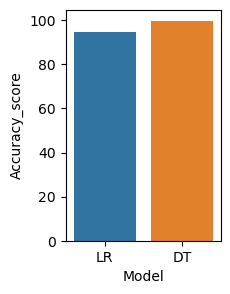

In [62]:
plt.figure(figsize=(2, 3))
sns.barplot(x='Model', y='Accuracy_score', data=result2)

From above model we select over-sampling Decision Tree model for credit-card fraud prediction 

In [63]:
from sklearn.metrics import mean_squared_error
y_pred2 = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:",rmse)

MSE: 0.0017651939065506347
RMSE: 0.042014210769103284


In [64]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt, X_test, y_test, scoring = "neg_mean_squared_error", cv = 10)
rmsr_score = np.sqrt(-score)
rmsr_score

array([0.07746764, 0.07746764, 0.07632328, 0.0739743 , 0.06774648,
       0.08610427, 0.07515797, 0.07092878, 0.069037  , 0.07747106])

## Selected Model : Under-sampling Dicision Tree Model 

### Model Saving 

In [89]:
model = DecisionTreeClassifier()

In [90]:
#Define hyperparameters for tuning
param_dist = {
    'ccp_alpha': [0.0, 0.1, 0.2],
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 100, 500],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [42],
    'splitter': ['best', 'random']
}
#Other parameters are : ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'

In [91]:
from sklearn.model_selection import RandomizedSearchCV
model_modified = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                      n_iter=10, cv=3, random_state=42)

In [92]:
model_modified.fit(X_res,y_res)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.2],
                                        'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [None, 100, 500],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.2],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2],
                                        'random_state': [42],
                                        'splitter': ['best', 'random']},
                   random_state=42)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [94]:
import joblib

In [95]:
joblib.dump(model_modified,"credit_card_model")

['credit_card_model']

In [96]:
model = joblib.load("credit_card_model")

In [101]:
# Example

model_prediction = model.predict([[ -1.99548801, -1.53430767,  1.57459532,  0.97852494, -1.70812266,
                                     0.22193637, -0.61892507,  1.66958205, -1.53166606,  3.64932501,
                                     5.55772905,  2.52030162,  0.06690429, -0.35525378, -2.95968492,
                                     0.31926394, -0.34667432, -2.28685011, -0.5195214 , -1.14738487,
                                     3.186728  , -1.16035737, -0.24978423, -0.2622213 ,  0.8516865 ,
                                     0.26150855,  0.95402116, -0.62249468, -3.34992173, -0.34739219]])

C:\Users\karti\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [100]:
if model_prediction == 0:
    print("This is Normal Transcation")
else:
    print("This is Fraudulent Transcation")

This is Fraudulent Transcation


## Create Pipeline for new dataset


In [78]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('Imputer' , SimpleImputer(strategy = "mean")),
                        ('Std_Scaler' , StandardScaler())
                         ])

                    
# TO acesses pipline                      
#data_transf = my_pipeline.fit_transform(DataFrame)